In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from math import log2
from sklearn import metrics
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay

In [25]:
# Import libraries
from sklearn.metrics import roc_auc_score
import xgboost as xgb

In [85]:
# Load data
df = pd.read_csv('/content/HR Data.csv')
df = df.drop(['Over18', 'CF_age band', 'emp no', 'Employee Number', 'Employee Count', 'Employee Count',
              'Standard Hours','CF_attrition label','CF_current Employee'], axis=1)

df['Attrition'] = df['Attrition'].replace(['Yes','No'],[1,0])

In [ ]:
#One Hot Encoding
obj_columns=df.dtypes[df.dtypes == "object"].index.values.tolist()
df_processed = pd.get_dummies(data= df, columns= obj_columns)
df_processed = df_processed.astype(float)

In [86]:
#Label Encoding
le = LabelEncoder()
obj_columns=df.dtypes[df.dtypes == "object"].index.values.tolist()
for col in obj_columns:
    df[col] = le.fit_transform(df[col])

df_new = df.copy()

In [92]:
a= len(df_processed.columns)
b= len(df_new.columns)

print(f'Numbers of OHE method are: {a}')
print(10*'#')
print(f'Numbers of LE method are: {b}')

Numbers of OHE method are: 56
##########
Numbers of LE method are: 31


**OHE**

In [99]:
# Define features and target
X = (df_processed.drop(['Attrition','Education Field_Human Resources', 'Education_Doctoral Degree', 'Department_HR',
                        'Over Time_Yes', 'Job Role_Research Director', 'Gender_Male','Performance Rating', 'Job Role_Healthcare Representative',
                        'Job Role_Manager'], axis= 1)).values
Y = (df_processed['Attrition']).values

# Split data into train and test sets
X_trainOHE, X_testOHE, y_trainOHE, y_testOHE = train_test_split(X, Y, test_size=0.35, random_state=42)

print ('Train set:', X_trainOHE.shape,  y_trainOHE.shape)
print ('Test set:', X_testOHE.shape,  y_testOHE.shape)

x_train_norm_OHE = preprocessing.StandardScaler().fit(X_trainOHE).transform(X_trainOHE.astype(float))
x_test_norm_OHE = preprocessing.StandardScaler().fit(X_testOHE).transform(X_testOHE.astype(float))


Train set: (955, 46) (955,)
Test set: (515, 46) (515,)


**LE**

In [102]:
X_le = df_new.drop('Attrition', axis=1)
Y_le =df_new['Attrition']

# Split data into train and test sets
X_trainle, X_testle, y_trainle, y_testle = train_test_split(X_le, Y_le, test_size=0.35, random_state=42)

print ('Train set:', X_trainle.shape,  y_trainle.shape)
print ('Test set:', X_testle.shape,  y_testle.shape)

x_train_norm_le = preprocessing.StandardScaler().fit(X_trainle).transform(X_trainle.astype(float))
x_test_norm_le = preprocessing.StandardScaler().fit(X_testle).transform(X_testle.astype(float))

Train set: (955, 30) (955,)
Test set: (515, 30) (515,)


In [114]:
# Create XGBoost classifiers based on OHE & LE
clf_OHE = xgb.XGBClassifier(n_estimators = 100)
clf_le = xgb.XGBClassifier(n_estimators = 100)

# Fit the model on the train set
clf_OHE.fit(x_train_norm_OHE, y_trainOHE)
clf_le.fit(x_train_norm_le,y_trainle)

# Predict the probabilities on the test set
y_predOHE = clf_OHE.predict_proba(x_test_norm_OHE)[:, 1]
y_predle = clf_le.predict_proba(x_test_norm_le)[:, 1]

In [113]:
# Compute the AUC score
auc = roc_auc_score(y_testOHE, y_predOHE)
auc2 = roc_auc_score(y_testle, y_predle)

# Print the AUC score
print("AUC score for OHE:", auc)
print("AUC score for LE:", auc2)

AUC score for OHE: 0.7889617930553944
AUC score for LE: 0.7914876320984787


OHE

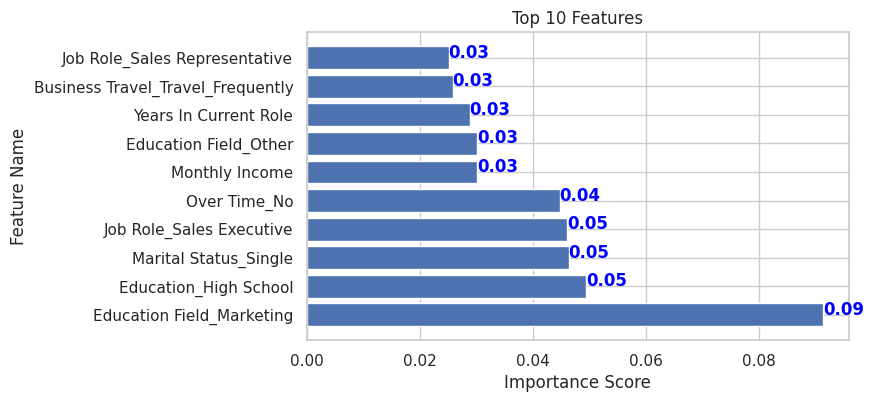

**************************************************************************************************************
                                   Important
Education Field_Marketing           0.091376
Education_High School               0.049433
Marital Status_Single               0.046356
Job Role_Sales Executive            0.046078
Over Time_No                        0.044779
Monthly Income                      0.030221
Education Field_Other               0.030168
Years In Current Role               0.028850
Business Travel_Travel_Frequently   0.025858
Job Role_Sales Representative       0.025115


In [111]:
# Get the feature names from the dataframe
feature_names = df_processed.drop(['Attrition','Education Field_Human Resources', 'Education_Doctoral Degree', 'Department_HR',
                        'Over Time_Yes', 'Job Role_Research Director', 'Gender_Male','Performance Rating', 'Job Role_Healthcare Representative',
                        'Job Role_Manager'], axis= 1).columns

# Get the feature importances from the model
feature_importances = clf_OHE.feature_importances_

# Sort the features by importance in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

#Creating a table
fi = pd.DataFrame(index = feature_names, data = feature_importances, columns = ['Important'])
fi.sort_values('Important', inplace= True )

# Filter the features by importance score
threshold= 0
selected_features = fi[fi['Important'] > threshold]

# Select the top n features
n = 10
top_n_features = selected_features.nlargest(n, 'Important')

# Plot the top n features
plt.figure(figsize=(7, 4))
plt.barh(top_n_features.index, top_n_features['Important'])
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.title(f'Top {n} Features')

# Add data labels to the bar chart
for i, v in enumerate(top_n_features['Important']):
    plt.text(v, i, str(round(v, 2)), color='blue', fontweight='bold')
plt.show()

# Print the top n features and their scores
print(55*'**')
print(top_n_features)

LE

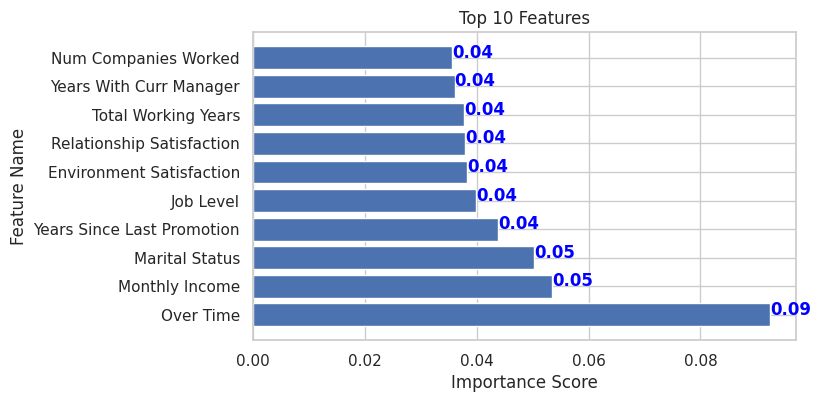

**************************************************************************************************************
                            Importance
Over Time                     0.092424
Monthly Income                0.053427
Marital Status                0.050280
Years Since Last Promotion    0.043869
Job Level                     0.039830
Environment Satisfaction      0.038288
Relationship Satisfaction     0.037935
Total Working Years           0.037724
Years With Curr Manager       0.036005
Num Companies Worked          0.035619


In [110]:
# Get the feature names from the dataframe
feature_names = df_new.drop('Attrition', axis=1).columns

# Get the feature importances from the model
feature_importances = clf_le.feature_importances_

# Sort the features by importance in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

#Creating a table
fi = pd.DataFrame(index = feature_names, data = feature_importances, columns = ['Importance'])
fi.sort_values('Importance', inplace= True )

# Filter the features by importance score
threshold= -10
selected_features = fi[fi['Importance'] > threshold]

# Select the top n features
n = 10
top_n_features = selected_features.nlargest(n, 'Importance')

# Plot the top n features
plt.figure(figsize=(7, 4))
plt.barh(top_n_features.index, top_n_features['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.title(f'Top {n} Features')

# Add data labels to the bar chart
for i, v in enumerate(top_n_features['Importance']):
    plt.text(v, i, str(round(v, 2)), color='blue', fontweight='bold')
plt.show()

# Print the top n features and their scores
print(55*'**')
print(top_n_features)